In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('positive_controls.csv', index_col=0)

In [6]:
print(df.columns)
print(f"{df.shape[0]} rows of data")
df.head()

Index(['inc_temp_degrees', 'inc_time_2_hrs', 'media', 'od', 'plate_id',
       'replicate', 'event', 'od_cutoff', 'source_container', 'lab_id', 'id',
       'gate', 'input', 'filename', 'output', 'Time', 'FSC_A', 'SSC_A',
       'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W',
       'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live', 'well',
       'inc_time_1_hrs'],
      dtype='object')
1831709 rows of data


,inc_temp_degrees,inc_time_2_hrs,media,od,plate_id,replicate,event,od_cutoff,source_container,lab_id,...,RL1_H,FSC_W,SSC_W,BL1_W,RL1_W,index,live_no_stain,live,well,inc_time_1_hrs
strain_name,,,,,,,,,,,,,,,,,,,,,
NOR-00-Control,37,18,standard_media,0.0003,0,42,0,0.1,ct1bvwm8bm7ac2,r1ceuhqmu6c7w_r1cf6snbv99p8,...,8742.0,1023.0,1023.0,0.0,0.0,2670155,0.0,0.0,C12,18
NOR-00-Control,37,18,standard_media,0.0003,0,42,1,0.1,ct1bvwm8bm7ac2,r1ceuhqmu6c7w_r1cf6snbv99p8,...,9783.0,90.0,224.0,0.0,0.0,2670156,1.0,1.0,C12,18
NOR-00-Control,37,18,standard_media,0.0003,0,42,2,0.1,ct1bvwm8bm7ac2,r1ceuhqmu6c7w_r1cf6snbv99p8,...,2051.0,29.0,41.0,0.0,0.0,2670157,1.0,1.0,C12,18
NOR-00-Control,37,18,standard_media,0.0003,0,42,3,0.1,ct1bvwm8bm7ac2,r1ceuhqmu6c7w_r1cf6snbv99p8,...,126.0,54.0,149.0,0.0,0.0,2670158,1.0,1.0,C12,18
NOR-00-Control,37,18,standard_media,0.0003,0,42,4,0.1,ct1bvwm8bm7ac2,r1ceuhqmu6c7w_r1cf6snbv99p8,...,118.0,93.0,217.0,0.0,0.0,2670159,1.0,1.0,C12,18


In [7]:
if 'level_0' in df.columns:
    df.drop(columns='level_0', inplace=True)
df.reset_index(drop=False, inplace=True)
df.set_index(['strain_name', 'inc_temp_degrees', 'inc_time_2_hrs', 'media', 'od', 'plate_id', 'replicate', 'event'], drop=True, inplace=True)

In [9]:
main_body = df.query("FSC_A < 500_000 and SSC_A < 500_000").shape[0]
print(f"{main_body} events below 500,000; {(main_body * 100 / df.shape[0]):2.1f}%")

1073425 events below 500,000; 58.6%


In [8]:
df.head()

od_cutoff  \
strain_name    inc_temp_degrees inc_time_2_hrs media          od     plate_id replicate event              
NOR-00-Control 37               18             standard_media 0.0003 0        42        0            0.1   
                                                                                        1            0.1   
                                                                                        2            0.1   
                                                                                        3            0.1   
                                                                                        4            0.1   

                                                                                              source_container  \
strain_name    inc_temp_degrees inc_time_2_hrs media          od     plate_id replicate event                    
NOR-00-Control 37               18             standard_media 0.0003 0        42        0       ct1bvwm8bm7ac2   
                                                                                        1       ct1bvwm8bm7ac2   
                                                                                        2       ct1bvwm8bm7ac2   
                                                                                        3       ct1bvwm8bm7ac2   
                                                                                        4       ct1bvwm8bm7ac2   

                                                                                                                    lab_id  \
strain_name    inc_temp_degrees inc_time_2_hrs media          od     plate_id replicate event                                
NOR-00-Control 37               18             standard_media 0.0003 0        42        0      r1ceuhqmu6c7w_r1cf6snbv99p8   
                                                                                        1      r1ceuhqmu6c7w_r1cf6snbv99p8   
                                                                                        2      r1ceuhqmu6c7w_r1cf6snbv99p8   
                                                                                        3      r1ceuhqmu6c7w_r1cf6snbv99p8   
                                                                                        4      r1ceuhqmu6c7w_r1cf6snbv99p8   

                                                                                                                      id  \
strain_name    inc_temp_degrees inc_time_2_hrs media          od     plate_id replicate event                              
NOR-00-Control 37               18             standard_media 0.0003 0        42        0      2019_02_04_20_09_19_0_C12   
                                                                                        1      2019_02_04_20_09_19_0_C12   
                                                                                        2      2019_02_04_20_09_19_0_C12   
                                                                                        3      2019_02_04_20_09_19_0_C12   
                                                                                        4      2019_02_04_20_09_19_0_C12   

                                                                                               gate  \
strain_name    inc_temp_degrees inc_time_2_hrs media          od     plate_id replicate event         
NOR-00-Control 37               18             standard_media 0.0003 0        42        0       NaN   
                                                                                        1       NaN   
                                                                                        2       NaN   
                                                                                        3       NaN   
                                                                                        4       NaN   

                                                                 

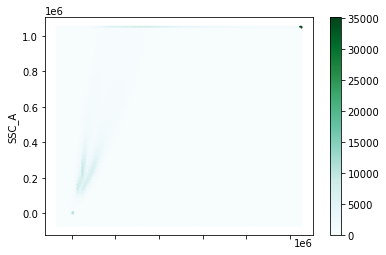

In [14]:
df.plot.hexbin(x='FSC_A', y='SSC_A');

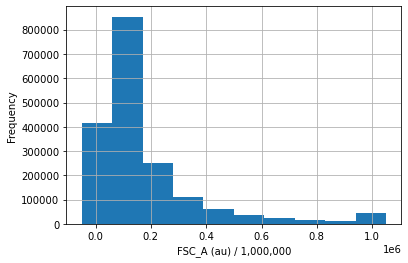

In [87]:
ax = df.plot.hist(column='FSC_A', range=(-50_000, 1_050_000), legend=None)
ax.grid(visible=True)
plt.xlabel('FSC_A (au) / 1,000,000');
plt.savefig("forward_scatter_saturation_positive_controls.pdf", format='pdf')


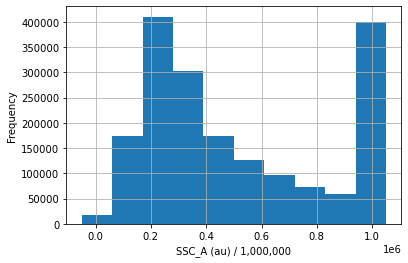

In [86]:
ax = df.plot.hist(column='SSC_A', range=(-50_000, 1_050_000), legend=None)
ax.grid(visible=True)
plt.xlabel('SSC_A (au) / 1,000,000');
plt.savefig("side_scatter_saturation_positive_controls.pdf", format='pdf')


<AxesSubplot:ylabel='Frequency'>

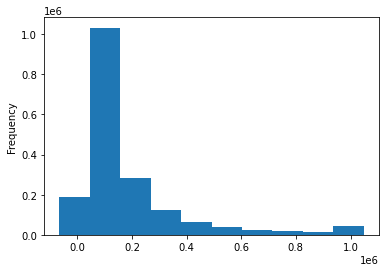

In [43]:
df['FSC_A'].plot(kind='hist', density=False)

[     0  50000 100000 150000 200000 250000 300000 350000 400000 450000
 500000]
[ -50000   50000  150000  250000  350000  450000  550000  650000  750000
  850000  950000 1050000] 12
[242858 946304 282622 128628  68614  42391  28227  20578  15172  11560
  44728] 11


<BarContainer object of 11 artists>

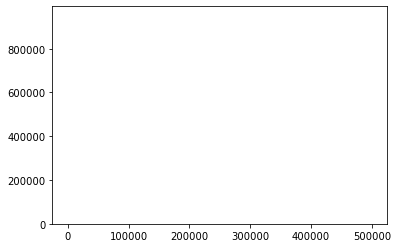

In [76]:
# df['FSC_A'].plot(kind='hist')
bins = np.array([ 100_000 * x for x in range(0, 12) ]) - 50_000
xs = np.array([ 50_000 * x for x in range(0, 11) ])
print(xs)
values, bins = np.histogram(df['FSC_A'], bins=bins)
print(bins, len(bins))
print(values, len(values))
plt.bar(xs, values)

(array([   836,     30,     35,     52,     76,    534,  11069,   3324,
           349,    260,    302,    457,    699,   1126,   1986,   3334,
          5356,   8162,  11953,  16553,  21445,  25970,  29446,  31357,
         33306,  34208,  34923,  35440,  35448,  36179,  36065,  36984,
         36713,  36845,  36522,  35352,  34590,  33111,  31283,  29323,
         28185,  26250,  24633,  23392,  21782,  20960,  19681,  18714,
         17844,  17124,  16419,  15687,  15324,  14380,  14112,  13852,
         13520,  13120,  12572,  12227,  11954,  11658,  11508,  11392,
         10977,  10685,  10436,  10193,  10052,   9775,   9441,   9323,
          9041,   9026,   8741,   8345,   8278,   8205,   7921,   7806,
          7457,   7381,   7233,   6950,   6811,   6678,   6480,   6391,
          6300,   6251,   6023,   5964,   5749,   5705,   5664,   5528,
          5323,   5484,   5215,   5199,   4960,   4995,   4880,   4642,
          4688,   4536,   4442,   4387,   4459,   4241,   4264, 

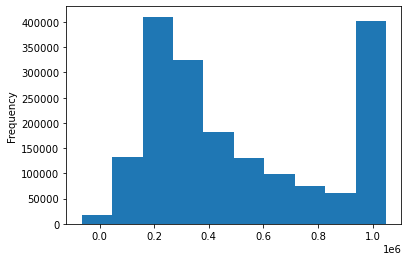

In [50]:
df['SSC_A'].plot(kind='hist')
np.histogram(df['SSC_A'], bins='auto')

In [49]:
df['FSC_A'].values.min(), \
df['FSC_A'].values.max()

(-65536.0, 1048575.0)

In [48]:
df['SSC_A'].values.min(), \
df['SSC_A'].values.max()

(-65536.0, 1048575.0)

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]), array([-0.05,  0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75,
        0.85,  0.95,  1.05]))


(0.0, 40000.0)

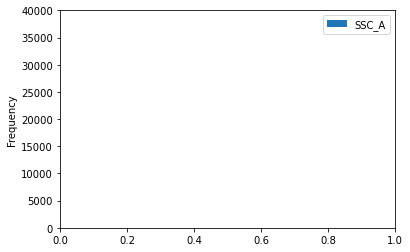

In [41]:
bins = [-0.05 + 0.1 * x for x in range(12)]
hist = np.histogram(df['SSC_A'].values, bins=bins, density=False)
print(hist)
ax = df.plot.hist(column='SSC_A', bins=bins)
ax.set_xlim((0, 1.0)) ; ax.set_ylim((0, 40_000))

# Forward Scatter Area as a function of incubation time (`inc_time_2`)

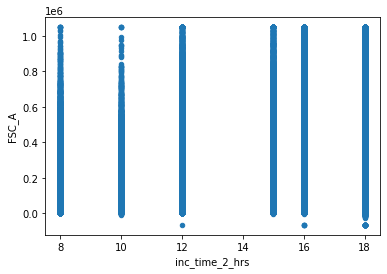

In [16]:
df.reset_index(level='inc_time_2_hrs', drop=False).plot.scatter(x='inc_time_2_hrs', y='FSC_A');

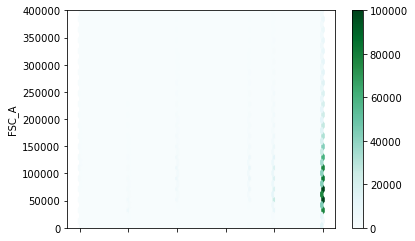

In [17]:
ax = df.reset_index(level='inc_time_2_hrs', drop=False).plot.hexbin(x='inc_time_2_hrs', y='FSC_A', vmax=100_000);
ax.set_ylim(0, 400_000);

## Plotting incubation times separately

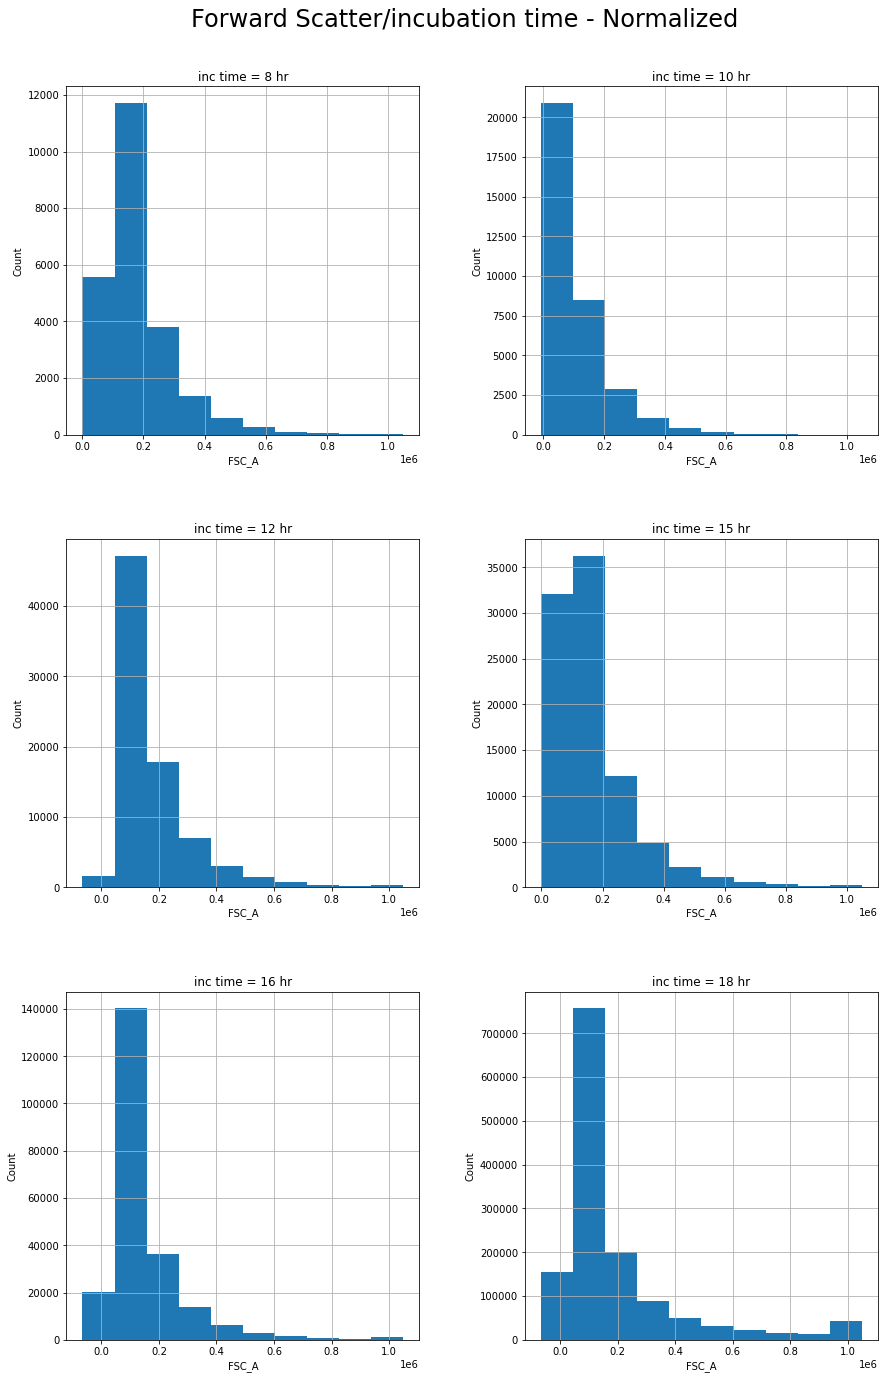

In [18]:
fig, axeses = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(axeses.shape[1] * 6, axeses.shape[0] * 6)
fig.tight_layout()
axeses = axeses.flatten()
i = 0
for group_name, df_group in df.groupby('inc_time_2_hrs'):
    ax = axeses[i]
    df_group.hist(column='FSC_A', ax=axeses[i])
    ax.set_title(f'inc time = {group_name} hr')
    ax.set_xlabel('FSC_A')
    ax.set_ylabel('Count')
    i += 1
fig.suptitle('Forward Scatter/incubation time - Normalized', y=1.05, fontsize=24);

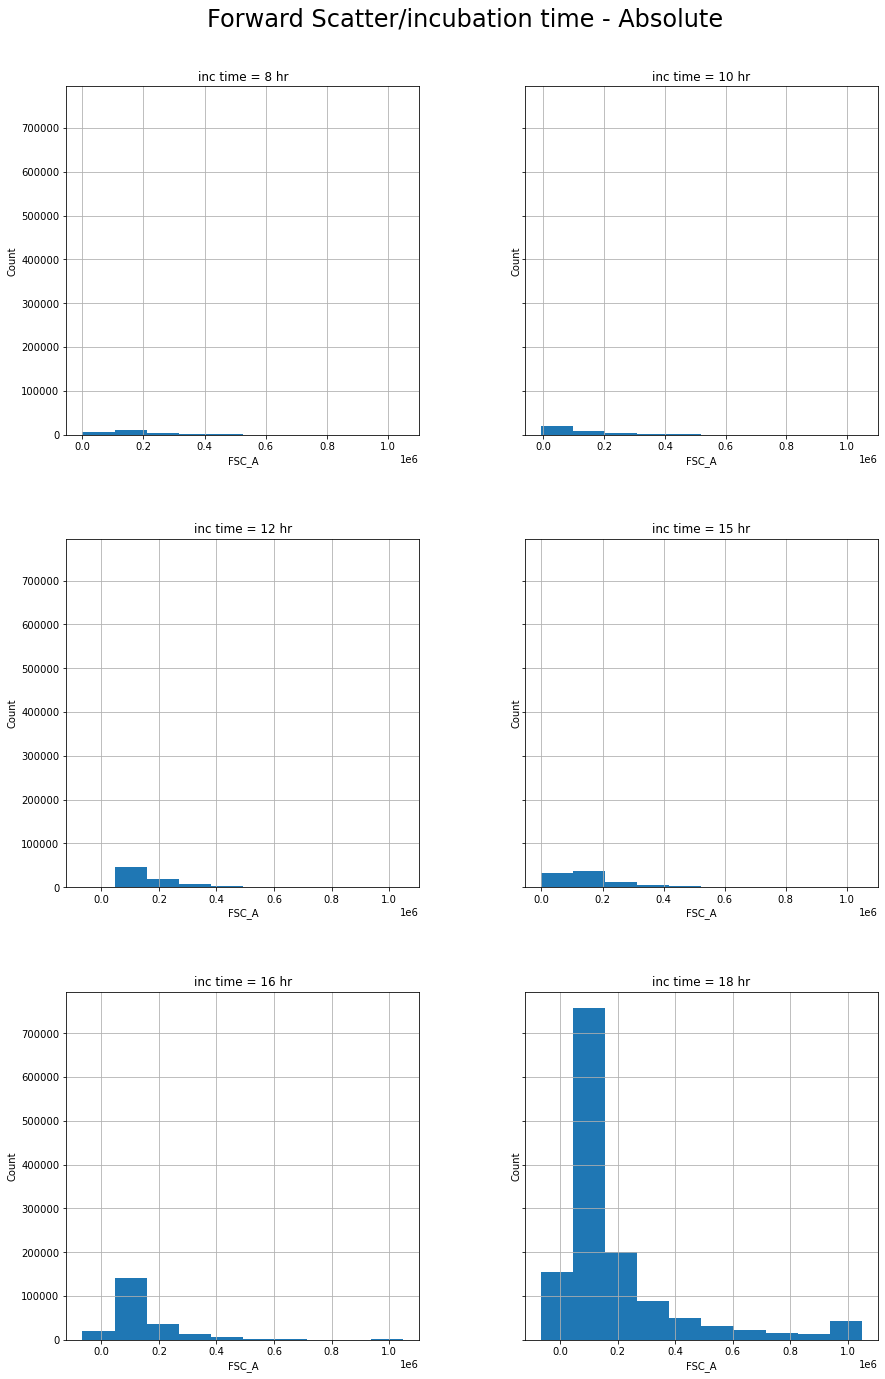

In [19]:
fig, axeses = plt.subplots(nrows=3, ncols=2, sharey=True)
fig.set_size_inches(axeses.shape[1] * 6, axeses.shape[0] * 6)
fig.tight_layout()
axeses = axeses.flatten()
i = 0
for group_name, df_group in df.groupby('inc_time_2_hrs'):
    ax = axeses[i]
    df_group.hist(column='FSC_A', ax=axeses[i])
    ax.set_title(f'inc time = {group_name} hr')
    ax.set_xlabel('FSC_A')
    ax.set_ylabel('Count')
    i += 1
    
fig.suptitle('Forward Scatter/incubation time - Absolute', y=1.05, fontsize=24);

# Considering both incubation times

In [20]:
for group_name, df_group in df.groupby(['inc_time_1_hrs','inc_time_2_hrs']):
    print(group_name)


(16, 16)
(18, 8)
(18, 10)
(18, 12)
(18, 15)
(18, 16)
(18, 18)


## Plotting incubation times separately

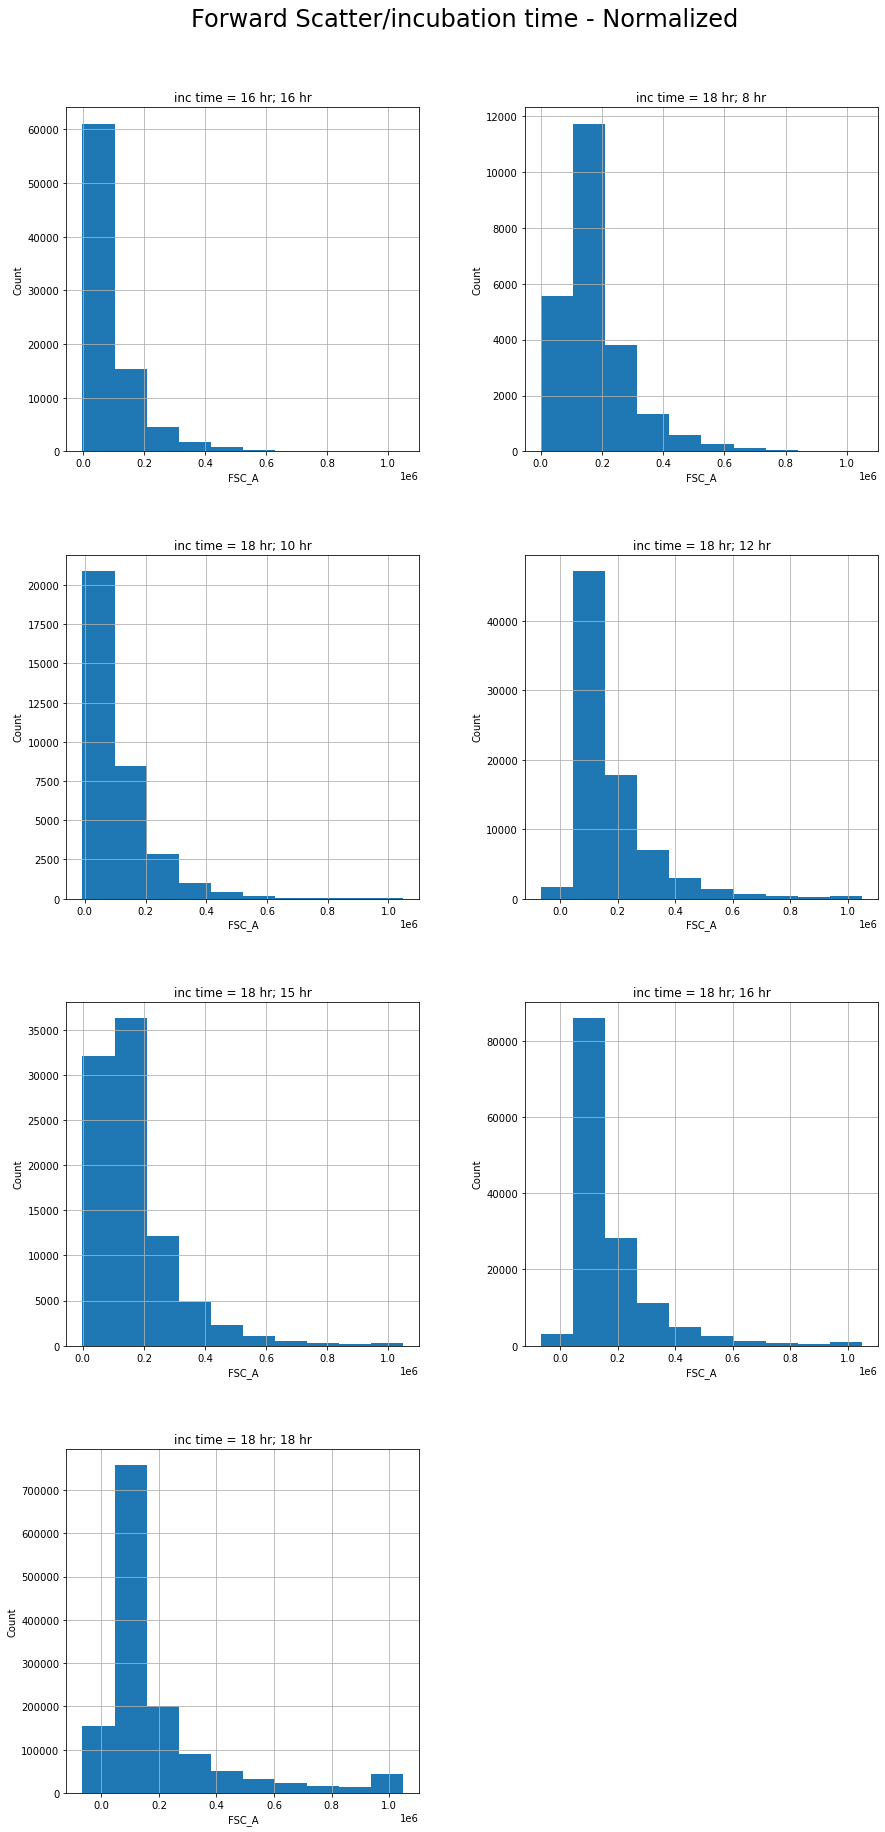

In [21]:
fig, axeses = plt.subplots(nrows=4, ncols=2)
fig.delaxes(axeses[3][1])
fig.set_size_inches(axeses.shape[1] * 6, axeses.shape[0] * 6)
fig.tight_layout()
axeses = axeses.flatten()
i = 0
for group_name, df_group in df.groupby(['inc_time_1_hrs','inc_time_2_hrs']):
    ax = axeses[i]
    df_group.hist(column='FSC_A', ax=axeses[i])
    ax.set_title(f'inc time = {group_name[0]} hr; {group_name[1]} hr')
    ax.set_xlabel('FSC_A')
    ax.set_ylabel('Count')
    i += 1
fig.suptitle('Forward Scatter/incubation time - Normalized', y=1.05, fontsize=24);

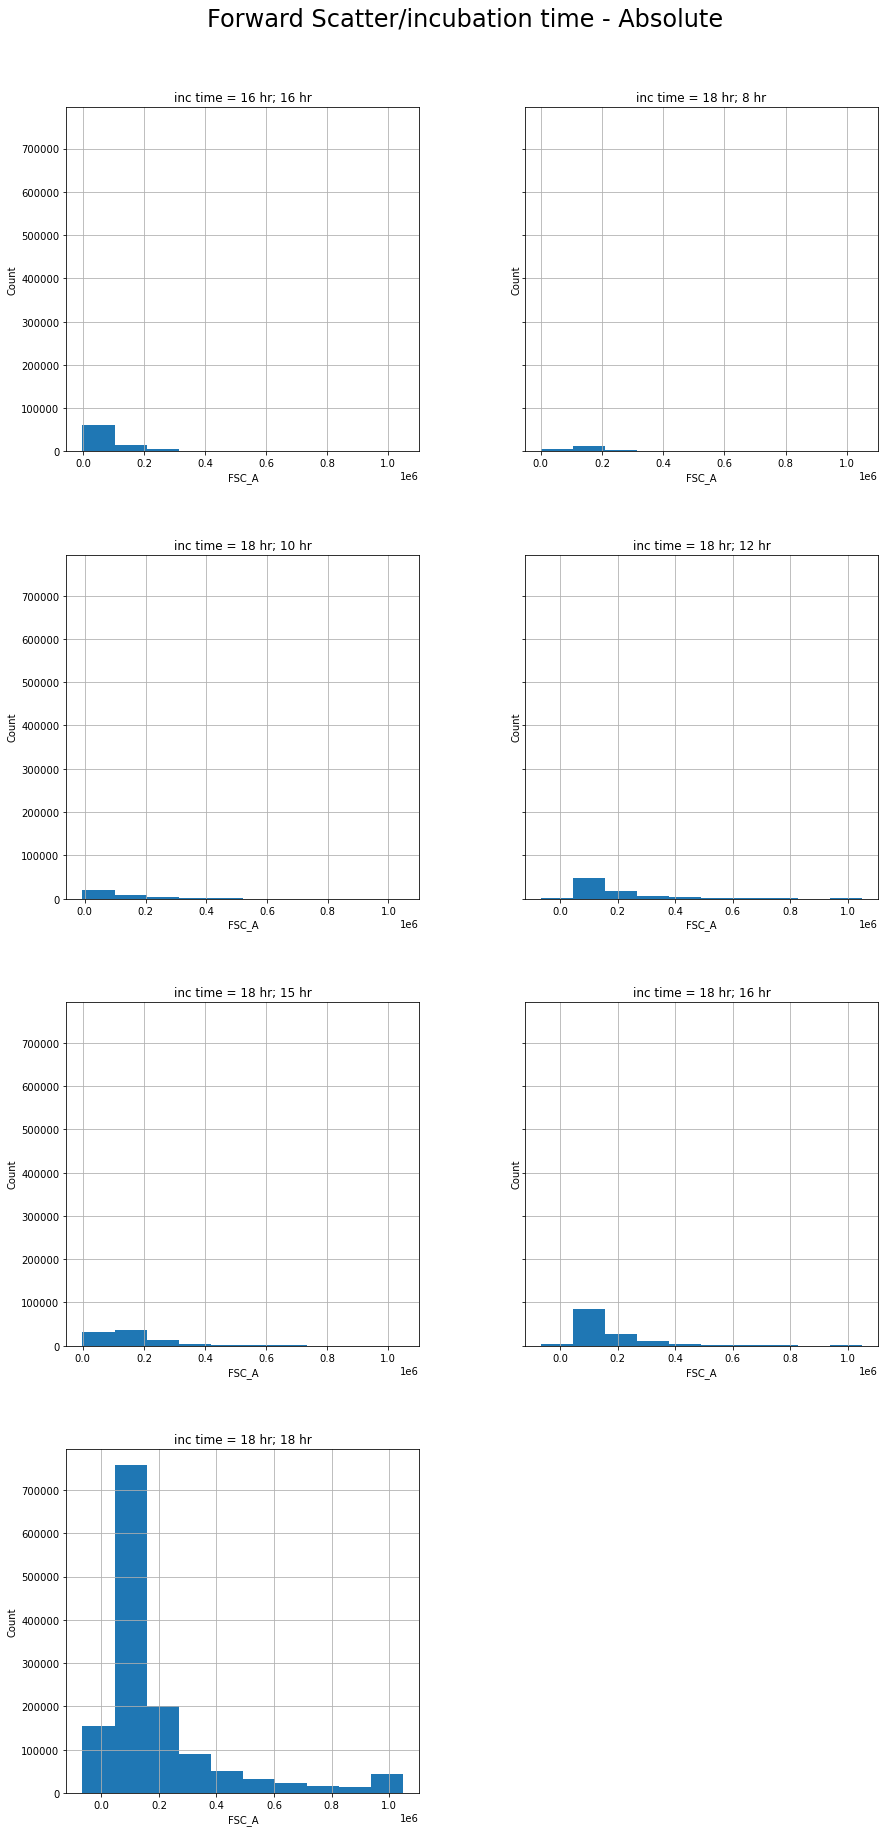

In [22]:
fig, axeses = plt.subplots(nrows=4, ncols=2, sharey=True)
fig.set_size_inches(axeses.shape[1] * 6, axeses.shape[0] * 6)
fig.delaxes(axeses[3][1])
fig.tight_layout()
axeses = axeses.flatten()
i = 0
for group_name, df_group in df.groupby(['inc_time_1_hrs','inc_time_2_hrs']):
    ax = axeses[i]
    df_group.hist(column='FSC_A', ax=axeses[i])
    ax.set_title(f'inc time = {group_name[0]} hr; {group_name[1]} hr')
    ax.set_xlabel('FSC_A')
    ax.set_ylabel('Count')
    i += 1
    
fig.suptitle('Forward Scatter/incubation time - Absolute', y=1.05, fontsize=24);

# Focus on 18 hour incubation time

This case has so much more data than any of the others that we should probably focus on it when making any gating decisions.

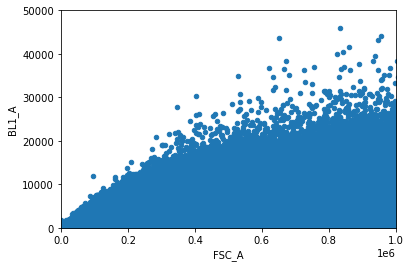

In [23]:
ax = df.query('inc_time_2_hrs == 18').plot.scatter(x='FSC_A', y='BL1_A')
ax.set_xlim(0, 1_000_000)
ax.set_ylim(0, 50_000);

In [24]:
df.query('inc_time_2_hrs == 18')[['FSC_A', 'SSC_A', 'BL1_A']].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99])

,FSC_A,SSC_A,BL1_A
count,1.380533e+06,1.380533e+06,1.380533e+06
mean,1.922185e+05,5.273586e+05,2.625217e+03
std,2.244307e+05,3.396308e+05,6.569186e+03
min,-6.553600e+04,-6.553600e+04,-9.859000e+03
25%,6.053800e+04,2.402610e+05,7.830000e+02
50%,1.073270e+05,4.020480e+05,1.359000e+03
75%,2.141030e+05,8.819930e+05,2.938000e+03
80%,2.624560e+05,1.048575e+06,3.610000e+03
85%,3.365484e+05,1.048575e+06,4.589000e+03
90%,4.666704e+05,1.048575e+06,6.153000e+03


## Side scatter measurements

The above chart shows that there are a number of SSC_A measurements that are substantially less than zero.  Does this suggest that the cytometer was not well-calibrated for side-scatter?  At any rate, am I correct in assuming we should gate out any events with SSC_A $\leq 0$?  This wouldn't be a substantial number of samples -- just 0.6%.

In [46]:
df.query('inc_time_2_hrs == 18 and SSC_A <= 0')['SSC_A'].describe()

count     8323.000000
mean     -9798.246906
std      18986.334168
min     -65536.000000
25%      -5697.500000
50%      -2721.000000
75%      -1186.000000
max          0.000000
Name: SSC_A, dtype: float64

In [47]:
df.query('inc_time_2_hrs == 18')['SSC_A'].describe()

count    1.380533e+06
mean     5.273586e+05
std      3.396308e+05
min     -6.553600e+04
25%      2.402610e+05
50%      4.020480e+05
75%      8.819930e+05
max      1.048575e+06
Name: SSC_A, dtype: float64

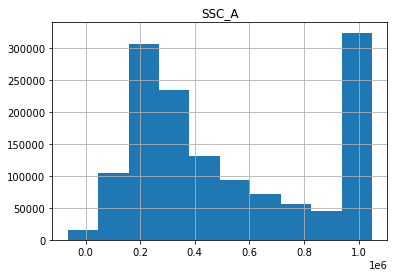

In [45]:
ax = df.query('inc_time_2_hrs == 18').hist(column='SSC_A')
#ax.set_xlim(0, 1_000_000)
#ax.set_ylim(0, 50_000);

## Single channel bound gating

Based on the above, we propose single channel gating as follows:

* $0 \leq$ **FSC_A** $< 900,000$
* $0 \leq$ **SSC_A** $< 900,000$
* $0 \leq$ **BL1_A** $< 20,000$

Values outside those ranges are likely to be mis-calibrated or otherwise outliers.

## Looking for sub-populations

Plotting Forward and Side-scatter to see if anything jumps out in terms of sub-populations.  Most of the population is very dispersed, but there's a definite chunk of the events that are small and that are correlated with having low fluorescence.

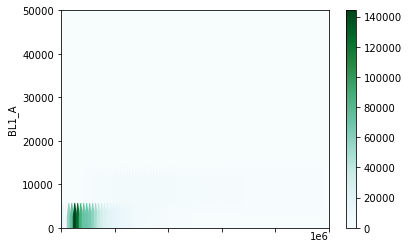

In [25]:
ax = df.query('inc_time_2_hrs == 18').plot.hexbin(x='FSC_A', y='BL1_A')
ax.set_xlim(0, 1_000_000)
ax.set_ylim(0, 50_000);

In [26]:
df.query('inc_time_2_hrs == 18')[['FSC_A', 'SSC_A']].describe()

,FSC_A,SSC_A
count,1.380533e+06,1.380533e+06
mean,1.922185e+05,5.273586e+05
std,2.244307e+05,3.396308e+05
min,-6.553600e+04,-6.553600e+04
25%,6.053800e+04,2.402610e+05
50%,1.073270e+05,4.020480e+05
75%,2.141030e+05,8.819930e+05
max,1.048575e+06,1.048575e+06


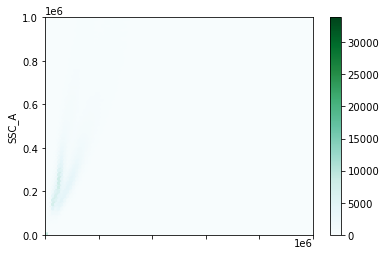

In [27]:
ax = df.query('inc_time_2_hrs == 18').plot.hexbin(x='FSC_A', y='SSC_A');
ax.set_xlim(0, 1_000_000); ax.set_ylim(0, 1_000_000);

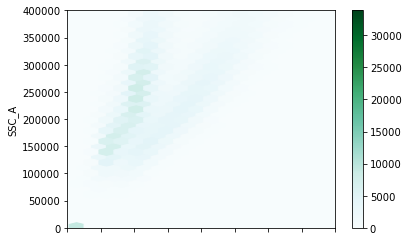

In [28]:
ax = df.query('inc_time_2_hrs == 18').plot.hexbin(x='FSC_A', y='SSC_A');
ax.set_xlim(0, 200_000); ax.set_ylim(0, 400_000);

Heatmap rescaled to make the two shapes clearer.

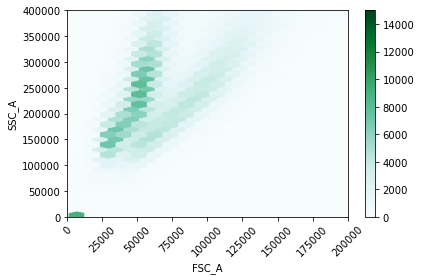

In [29]:
ax = df.query('inc_time_2_hrs == 18').plot.hexbin(x='FSC_A', y='SSC_A', vmax=15_000);
fig = ax.figure
ax.set_xlim(0, 200_000); ax.set_ylim(0, 400_000);
xaxis = ax.get_xaxis()
xaxis.set_label_text('FSC_A', visible=True)
#ax.tick_params(axis='x',which='major')
xaxis.set_ticks(range(0, 200_001, 25_000))
#print(ax.get_xticks())
#plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=True)
#print([str(int(x)) for x in ax.get_xticks()])
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, rotation=45, labeltop=False)
#lst = ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()], visible=True, rotation=45)
#print(ax.get_xticklabels())
#print(lst)
fig.tight_layout()



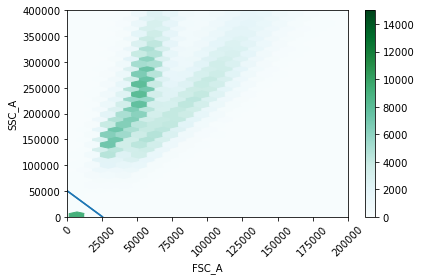

In [30]:
ax = df.query('inc_time_2_hrs == 18').plot.hexbin(x='FSC_A', y='SSC_A', vmax=15_000);
fig = ax.figure
ax.set_xlim(0, 200_000); ax.set_ylim(0, 400_000);
xaxis = ax.get_xaxis()
xaxis.set_label_text('FSC_A', visible=True)
#ax.tick_params(axis='x',which='major')
xaxis.set_ticks(range(0, 200_001, 25_000))
#print(ax.get_xticks())
#plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=True)
#print([str(int(x)) for x in ax.get_xticks()])
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, rotation=45, labeltop=False)
#lst = ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()], visible=True, rotation=45)
#print(ax.get_xticklabels())
#print(lst)
ax.axline((25_000, 0), (0, 50_000))
ax.axline((25_000, 0), (0, 50_000))

fig.tight_layout()



In [31]:
data_points = df.query('inc_time_2_hrs == 18 and SSC_A < 400_000 and FSC_A < 150_000')[['FSC_A', 'SSC_A']].to_numpy()

In [32]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data_points)

In [33]:
scaled[0:10, :]

array([[-0.91805035, -1.43494759],
       [-0.47476578, -0.26880854],
       [ 1.60813408,  0.09885122],
       [ 1.1477179 ,  0.14946458],
       [ 1.40896692,  1.24603995],
       [ 0.69620757, -0.02744457],
       [ 2.099996  ,  1.7998167 ],
       [-0.45698647, -1.02426647],
       [ 2.3831696 ,  1.73173816],
       [ 1.05007742,  1.61007598]])

In [34]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [35]:
kmeans.fit(scaled)

KMeans(init='random', n_clusters=5, random_state=42)

In [36]:
kmeans.cluster_centers_

array([[ 1.66637067,  1.10435056],
       [-0.50966162, -0.49533855],
       [-0.27202778,  0.94102962],
       [ 0.76335228, -0.05163065],
       [-1.20689516, -1.48716051]])

In [37]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[119785.26354968, 331077.35885613],
       [ 52592.46580795, 196435.53716375],
       [ 59930.26265062, 317331.04511208],
       [ 91901.33346247, 233781.31859756],
       [ 31062.88095261, 112956.36927525]])

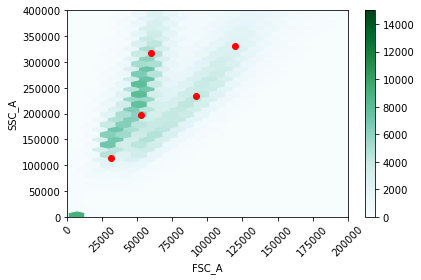

In [38]:
ax = df.query('inc_time_2_hrs == 18').plot.hexbin(x='FSC_A', y='SSC_A', vmax=15_000);
fig = ax.figure
ax.set_xlim(0, 200_000); ax.set_ylim(0, 400_000);
xaxis = ax.get_xaxis()
xaxis.set_label_text('FSC_A', visible=True)
#ax.tick_params(axis='x',which='major')
xaxis.set_ticks(range(0, 200_001, 25_000))
#print(ax.get_xticks())
#plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=True)
#print([str(int(x)) for x in ax.get_xticks()])
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, rotation=45, labeltop=False)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
ax.scatter(centroids[:, 0], centroids[:, 1], color='red')
#lst = ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()], visible=True, rotation=45)
#print(ax.get_xticklabels())
#print(lst)
fig.tight_layout()



## Zoom in to find bounds on debris cluster

There are 5733 events in the debris cluster area out of 1380533.


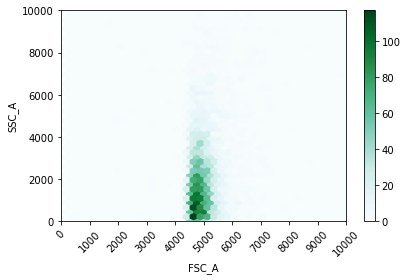

In [39]:
small_datapoints = df.query('inc_time_2_hrs == 18 and 0 <= SSC_A <= 25_000 and 0 <= FSC_A < 25_000')
print(f'There are {small_datapoints.shape[0]} events in the debris cluster area out of {df.query("inc_time_2_hrs == 18").shape[0]}.')
ax = small_datapoints.plot.hexbin(x='FSC_A', y='SSC_A');
fig = ax.figure
ax.set_xlim(0, 10_000); ax.set_ylim(0, 10_000);
xaxis = ax.get_xaxis()
xaxis.set_label_text('FSC_A', visible=True)
#ax.tick_params(axis='x',which='major')
xaxis.set_ticks(range(0, 10_001, 1000))
#print(ax.get_xticks())
#plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=True)
#print([str(int(x)) for x in ax.get_xticks()])
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, rotation=45, labeltop=False)
#lst = ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()], visible=True, rotation=45)
#print(ax.get_xticklabels())
#print(lst)
fig.tight_layout()



# Gating out the debris cluster
From the above, it looks like even an aggressive gate at 50,000 on the two scatter channels would safely get rid of the debris cluster without a lot of false positives, but we should examine the implications for this that we see in the negative controls, before applying them.  Here we do so, by focusing on only those events with very low scatter measurements.

In [40]:
df.query('inc_time_2_hrs == 18 and FSC_A < 50_000 and SSC_A < 50_000')[['FSC_A', 'SSC_A', 'BL1_A']].describe()

,FSC_A,SSC_A,BL1_A
count,13671.000000,13671.000000,1.367100e+04
mean,5911.466096,1225.276571,7.184778e+01
std,4653.970296,9426.558996,8.968346e+03
min,-65536.000000,-65536.000000,-3.680000e+02
25%,4692.000000,-2482.500000,-3.700000e+01
50%,4921.000000,-251.000000,-1.000000e+01
75%,5259.000000,1945.500000,1.900000e+01
max,49938.000000,49991.000000,1.048575e+06


In [41]:
df.query('inc_time_2_hrs == 18 and FSC_A < 50_000 and SSC_A < 50_000')[['FSC_A', 'SSC_A', 'BL1_A']].describe(percentiles=[.75, .8, .85, .90, .95])

,FSC_A,SSC_A,BL1_A
count,13671.000000,13671.000000,1.367100e+04
mean,5911.466096,1225.276571,7.184778e+01
std,4653.970296,9426.558996,8.968346e+03
min,-65536.000000,-65536.000000,-3.680000e+02
50%,4921.000000,-251.000000,-1.000000e+01
75%,5259.000000,1945.500000,1.900000e+01
80%,5378.000000,2567.000000,2.600000e+01
85%,5557.000000,3461.000000,3.500000e+01
90%,5933.000000,5150.000000,4.700000e+01
95%,12488.500000,18970.000000,7.000000e+01


The above suggests that a less aggressive gate at FSC_A < 15,000 and SSC_A < 20,000 would probably be appropriate.  

The following tables aim to see how much data would be sacrificed by this less aggressive gate (not much).  They also identify where it seems like the true outliers start.  For exmaple in the first chart, the distance between the 75th percentile and the max is large for the two scatter channels and BL1_A fluorescence.

In [42]:
df.query('inc_time_2_hrs == 18 and FSC_A < 15_000 and SSC_A < 20_000')[['FSC_A', 'SSC_A', 'BL1_A']].describe()

,FSC_A,SSC_A,BL1_A
count,12858.000000,12858.000000,1.285800e+04
mean,5147.547675,-694.428371,7.049977e+01
std,1431.638043,4280.859095,9.247449e+03
min,-65536.000000,-65536.000000,-2.960000e+02
25%,4692.000000,-2656.500000,-3.800000e+01
50%,4906.000000,-457.500000,-1.100000e+01
75%,5206.000000,1501.000000,1.700000e+01
max,14997.000000,19971.000000,1.048575e+06


In [43]:
df.query('inc_time_2_hrs == 18')[['FSC_A', 'SSC_A', 'BL1_A']].describe()

,FSC_A,SSC_A,BL1_A
count,1.380533e+06,1.380533e+06,1.380533e+06
mean,1.922185e+05,5.273586e+05,2.625217e+03
std,2.244307e+05,3.396308e+05,6.569186e+03
min,-6.553600e+04,-6.553600e+04,-9.859000e+03
25%,6.053800e+04,2.402610e+05,7.830000e+02
50%,1.073270e+05,4.020480e+05,1.359000e+03
75%,2.141030e+05,8.819930e+05,2.938000e+03
max,1.048575e+06,1.048575e+06,1.048575e+06


In [44]:
df.query('inc_time_2_hrs == 18 and FSC_A >= 15_000 and SSC_A >= 20_000')[['FSC_A', 'SSC_A', 'BL1_A']].describe()

,FSC_A,SSC_A,BL1_A
count,1.364359e+06,1.364359e+06,1.364359e+06
mean,1.938308e+05,5.334811e+05,2.636961e+03
std,2.242704e+05,3.368589e+05,4.872327e+03
min,1.500400e+04,2.016600e+04,-5.272000e+03
25%,6.146400e+04,2.444510e+05,7.990000e+02
50%,1.084590e+05,4.081790e+05,1.378000e+03
75%,2.158335e+05,8.921885e+05,2.971000e+03
max,1.048575e+06,1.048575e+06,1.048575e+06


# Some more to do

1. Track number of events per experimental well.  See how many have less than the 30,000 wells.
2. Plot the FSC/SSC for individual plates separately and check for drift.

# Events per experimental well

Do we get the full number of events from each experimental well?  If not, what does this tell us, and should we use this information to filter the data?

In [11]:
len(df['lab_id'].unique())

75

In [12]:
df.shape[0] / len(df['lab_id'].unique())

24422.786666666667

In [21]:
ser = df.groupby('lab_id')['id'].count()
ser.name = 'Event count'
with pd.option_context('display.max_rows', None):
    print(ser.sort_values())

lab_id
r1ce3p4vgfu3p_r1ceebve8d6tc         43
r1ce3p63vnpzq_r1cee5f7knupg         44
r1cwvvxz5d7wua_r1cx7ucsnkjfsb       93
r1cwvvvj2bh6hc_r1cx4pbeyv2q29      112
r1cbut53kpf3n_r1cc3bn2s2aj8        361
r1d6r58jnct63g_r1d8kxz5ndkxyh      411
r1ce3p3p7j77n_r1ceevbnsqku2        679
r1cbut6a79n9t_r1cc34mkuvzeh       2040
r1d6r59sste9m2_r1d8gf8cczkrz9     2077
r1c7cprv7fe49_r1c7jmje3ebhc       3055
r1cgbw8qkp6z4_r1cgjpjx5ve76       3401
r1d6r8mvznxxme_r1d8jxmssfag5w     3877
r1d6r5b24f9a9z_r1d8cyvjthnvvt     4854
r1cwvvwryt3q49_r1cx4ux3zcdt4w    15935
r1cgbw3xk7pau_r1cgpa54x8ff3      16367
r1d6r8ykf868ep_r1d98fh76wrqp7    19738
r1c7cpqp2k6cw_r1c7jn9syrr8s      24311
r1c5vad8u7ve2_r1c66q7cru28u      24311
r1cfkpq8n84aj_r1cftg78pbqd7      30000
r1cfkpp2p3kjz_r1cftpr8wxqc7      30000
r1c5va9wyf3mx_r1c63bjzu5ruy      30000
r1ceuhvgf7b4y_r1cf2yr353x5j      30000
r1cfkprehr2fj_r1cft8f7cbsp7      30000
r1ceuhu9enre5_r1cf33y4j6dyg      30000
r1ceuhrtvgyvd_r1cf6kx2a233e      30000
r1cf3p48cauwv_r1cf

In [26]:
events_df = df.reset_index('inc_time_2_hrs', drop=False).groupby('lab_id')[['id', 'inc_time_1_hrs', 'inc_time_2_hrs']].agg({'id': 'count', 'inc_time_1_hrs': 'first', 'inc_time_2_hrs': 'first'})
events_df =events_df.rename(columns={'id': 'events'}).sort_values(by='events')                                                                     
# ser.name = 'Event count'
with pd.option_context('display.max_rows', None):
     print(events_df)

                               events  inc_time_1_hrs  inc_time_2_hrs
lab_id                                                               
r1ce3p4vgfu3p_r1ceebve8d6tc        43              18              18
r1ce3p63vnpzq_r1cee5f7knupg        44              18              18
r1cwvvxz5d7wua_r1cx7ucsnkjfsb      93              18               8
r1cwvvvj2bh6hc_r1cx4pbeyv2q29     112              18               8
r1cbut53kpf3n_r1cc3bn2s2aj8       361              18              18
r1d6r58jnct63g_r1d8kxz5ndkxyh     411              18               8
r1ce3p3p7j77n_r1ceevbnsqku2       679              18              18
r1cbut6a79n9t_r1cc34mkuvzeh      2040              18              18
r1d6r59sste9m2_r1d8gf8cczkrz9    2077              18               8
r1c7cprv7fe49_r1c7jmje3ebhc      3055              18              18
r1cgbw8qkp6z4_r1cgjpjx5ve76      3401              18              16
r1d6r8mvznxxme_r1d8jxmssfag5w    3877              18              10
r1d6r5b24f9a9z_r1d8c

## Further filtering
The above suggests we should reject out of hand replicates with event counts less than 10K (value suggested by Rob Moseley), and probably ignore all data for the second incubation time less than 10, since none of the 8 hour replicates has a full set of samples.

In [27]:
bad_replicates = events_df[events_df['events'] < 10_000].reset_index(drop=False)['lab_id']
bad_replicates

0       r1ce3p4vgfu3p_r1ceebve8d6tc
1       r1ce3p63vnpzq_r1cee5f7knupg
2     r1cwvvxz5d7wua_r1cx7ucsnkjfsb
3     r1cwvvvj2bh6hc_r1cx4pbeyv2q29
4       r1cbut53kpf3n_r1cc3bn2s2aj8
5     r1d6r58jnct63g_r1d8kxz5ndkxyh
6       r1ce3p3p7j77n_r1ceevbnsqku2
7       r1cbut6a79n9t_r1cc34mkuvzeh
8     r1d6r59sste9m2_r1d8gf8cczkrz9
9       r1c7cprv7fe49_r1c7jmje3ebhc
10      r1cgbw8qkp6z4_r1cgjpjx5ve76
11    r1d6r8mvznxxme_r1d8jxmssfag5w
12    r1d6r5b24f9a9z_r1d8cyvjthnvvt
Name: lab_id, dtype: object

# Plotting individual scatter results

In [34]:
bad = list(bad_replicates)
filtered_df = df.query(f'lab_id not in {bad} and inc_time_1_hrs == 18 and inc_time_2_hrs == 18')

In [35]:
filtered_df.shape

(1374311, 26)

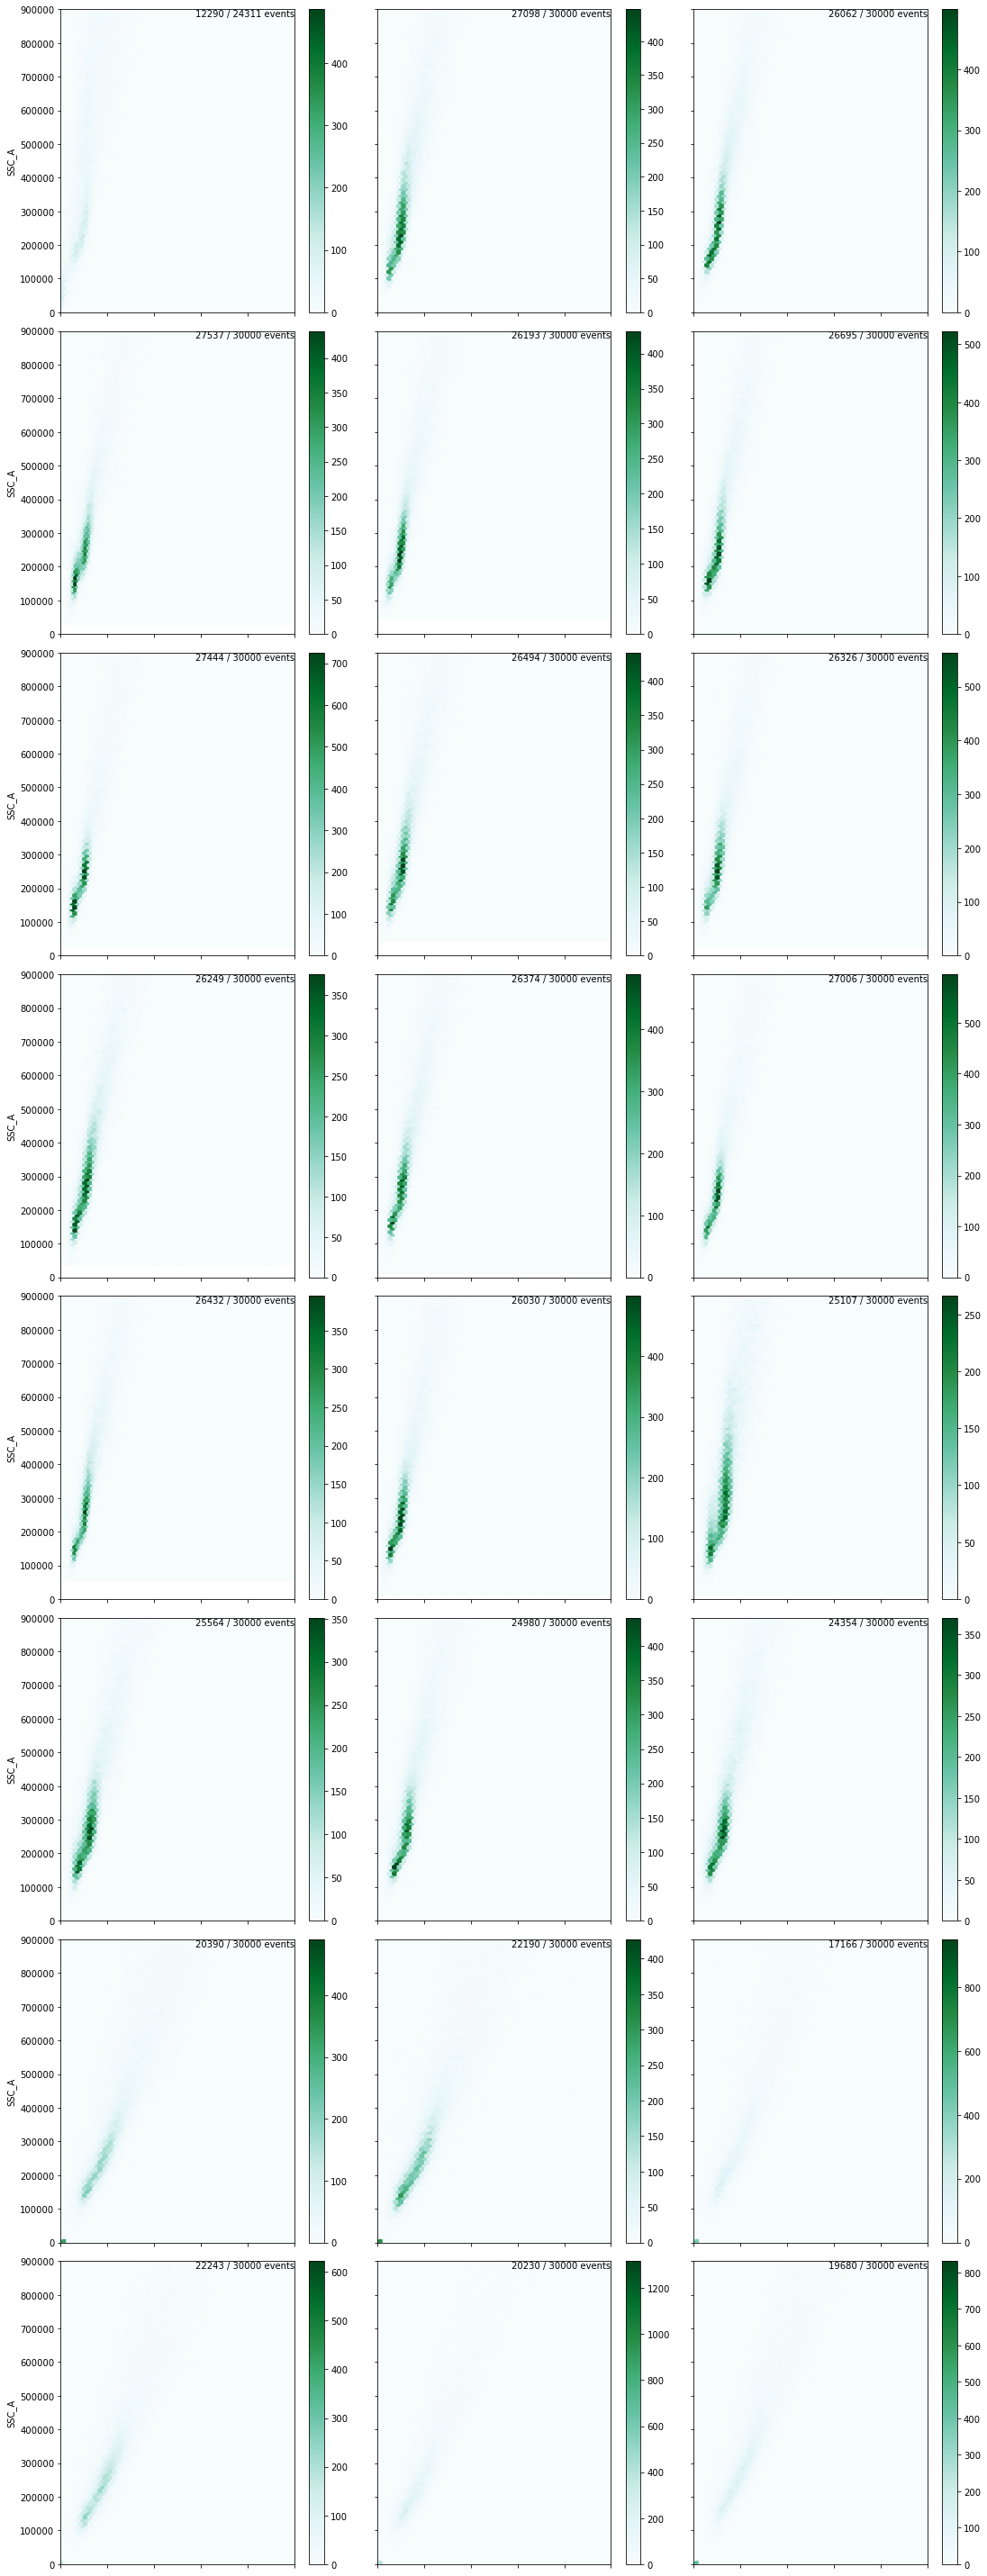

In [48]:
nrows = 8 ; ncols = 3
xlim = 500_000 ; ylim = 900_000
fig, axeses = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
fig.set_size_inches(ncols * 5, nrows * 5)
fig.tight_layout()
i = 0
axeses = axeses.flatten()
axeses[0].set_xlim(0, xlim); axeses[0].set_ylim(0, ylim)
for group_name, group in filtered_df.groupby('lab_id'):
    if i >= (ncols * nrows):
        break
    ax = axeses[i]
    subset = group.query(f"FSC_A < {xlim} and SSC_A < {ylim}")
    ax.text(xlim, ylim, f'{subset.shape[0]} / {group.shape[0]} events', ha='right', va='top')
    group.plot.hexbin(x='FSC_A', y='SSC_A', ax=ax)

    i += 1

In [54]:
xlim = 500_000 ; ylim = 900_000
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(filtered_df.groupby('lab_id').apply(lambda df: pd.Series({'filtered_events': df.query(f"FSC_A < {xlim} and SSC_A < {ylim}").shape[0], 'events':df.shape[0]})))

                               filtered_events  events
lab_id                                                
r1c7cpqp2k6cw_r1c7jn9syrr8s              12290   24311
r1c7cpu9nj2bu_r1c7fg23qkzph              27098   30000
r1c7cpvfzqprk_r1c7fbvba55db              26062   30000
r1c84xvquwxth_r1c8ek7vcmdxh              27537   30000
r1c84xwx57y95_r1c8ejz8jfg9z              26193   30000
r1c84xzc5dbuv_r1c8axrywctwb              26695   30000
r1c84y3r9yqxb_r1c8auwvzbgt3              27444   30000
r1c8xx6qe9eea_r1c93enbf48t7              26494   30000
r1c8xx7we38vw_r1c93cukfcxqp              26326   30000
r1c8xx94j94u7_r1c93ajvdzxz5              26249   30000
r1c8yx25rrtag_r1c96v2w8x5pq              26374   30000
r1c8yydkumrkr_r1c96xsxw79c9              27006   30000
r1c8yyg9gxbme_r1c96wn43pq45              26432   30000
r1c9tpmcezpk2_r1c9wjnedp92f              26030   30000
r1cbajqru7kbe_r1cbe9p9zu6dh              25107   30000
r1cbuszfskzjt_r1cc6ws9c3dh4              25564   30000
r1cbut2pdj